In [119]:
import numpy as np
import pandas as pd


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [120]:
train = pd.read_csv("train_Houseprice_prdiction_Preprocessed_1.csv")
test = pd.read_csv("test_Houseprice_prdiction_Preprocessed_1.csv")

In [121]:
train.head()

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),SQ_FT,BHK_NO,BHK_OR_RK,ADDRESS
0,0,0,1,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,1300.236407,2,BHK,"Ksfc Layout,Bangalore"
1,0,1,0,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,1275.000000,2,BHK,"Vishweshwara Nagar,Mysore"
2,0,0,1,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,933.159722,2,BHK,"Jigani,Bangalore"
3,0,0,1,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,929.921143,2,BHK,"Sector-1 Vaishali,Ghaziabad"
4,0,1,0,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,999.009247,2,BHK,"New Town,Kolkata"


In [104]:
test.shape

(68720, 16)

In [105]:
train_X = train.drop(columns= ["SQUARE_FT","UNDER_CONSTRUCTION","TARGET(PRICE_IN_LACS)","BHK_NO.","BHK_OR_RK","ADDRESS","LONGITUDE","LATITUDE"])

In [106]:
test_X = test.drop(columns= ["SQUARE_FT","UNDER_CONSTRUCTION","TARGET(PRICE_IN_LACS)","BHK_NO.","BHK_OR_RK","ADDRESS","LONGITUDE","LATITUDE"])

In [107]:
train_X.shape

(29451, 8)

In [108]:
test_X.shape

(68720, 8)

In [109]:
train_y = train["TARGET(PRICE_IN_LACS)"]
train_y.isna().sum()

0

In [110]:
sample = pd.read_csv("sample_submission.csv")

In [111]:
sample.head()

,TARGET(PRICE_IN_LACS)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [112]:
def run_model(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
    pd.Series(model.coef_,index=test_X.columns).plot(kind = "bar")
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    print("RMSE of Train Data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
    print("Cross validation Score  = ",np.mean(np.abs(score)))
    sample["TARGET(PRICE_IN_LACS)"] = pred_test
    sample.to_csv(filename, index = False)

In [113]:
sample.head()

,TARGET(PRICE_IN_LACS)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [114]:
sample.isna().sum()

TARGET(PRICE_IN_LACS)    0
dtype: int64

RMSE of Train Data =  576.1088834440335
Cross validation Score  =  637.6548571687875


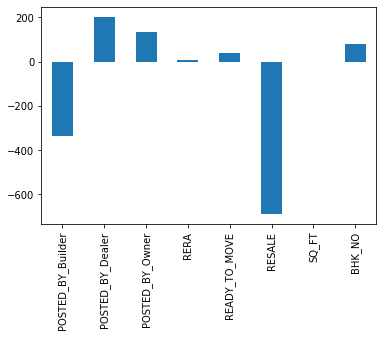

In [115]:
model = LinearRegression()
run_model(model, train_X, train_y, test_X, sample, "test_result_Linear_regression_1.csv" )

RMSE of Train Data =  576.1322960407747
Cross validation Score  =  637.6195039498391


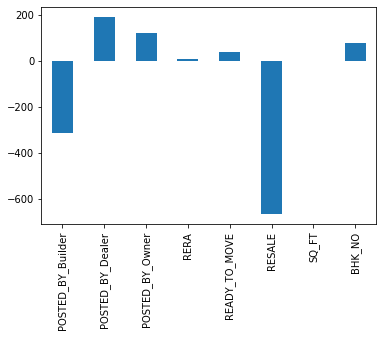

In [116]:
model = Ridge(alpha = 30)
run_model(model, train_X, train_y, test_X, sample, "test_result_Ridge_regression_1.csv" )

RMSE of Train Data =  593.5779025305275
Cross validation Score  =  652.7455996454353


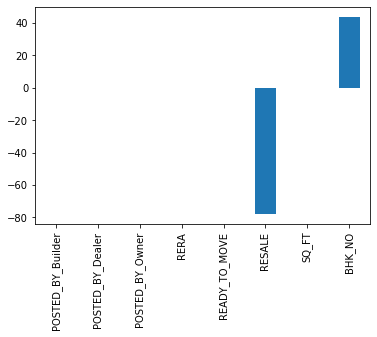

In [117]:
model = Lasso(alpha=30)
run_model(model, train_X, train_y, test_X, sample, "test_result_Lasso_regression_1.csv" )

RMSE of Train Data =  591.9350530221782
Cross validation Score  =  651.2565568828868


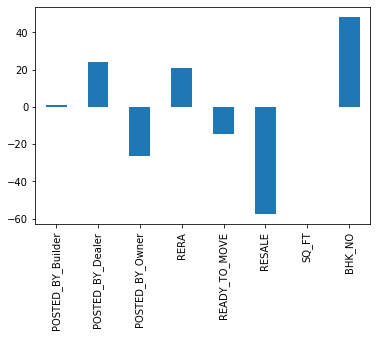

In [118]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
run_model(model, train_X, train_y, test_X, sample, "test_result_ElasticNet_regression_1.csv" )